## **1. Import libraries**

In [2]:
! pip install lazypredict

     |████████████████████████████████| 72 kB 1.1 MB/s 
     |████████████████████████████████| 127.6 MB 20 kB/s 
     |████████████████████████████████| 6.8 MB 39.6 MB/s 
     |████████████████████████████████| 10.1 MB 47.0 MB/s 
     |████████████████████████████████| 248 kB 67.9 MB/s 
     |████████████████████████████████| 269 kB 39.4 MB/s 
     |████████████████████████████████| 14.5 MB 57.3 MB/s 
     |████████████████████████████████| 1.2 MB 56.8 MB/s 
     |████████████████████████████████| 25.9 MB 68.4 MB/s 
     |████████████████████████████████| 302 kB 65.1 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=d7c585060441e746d02b820e1f2689dca15d99d8104ffc57dc5d3ce3d032e0c4
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# align numpy and pandas versions to fix ImportError: cannot import name 'values_from_object' from 'pandas._libs.lib' #337
!pip uninstall numpy -y
!pip install numpy==1.20.1

!pip uninstall pandas -y
!pip install pandas==1.2.2

Found existing installation: numpy 1.19.1
Uninstalling numpy-1.19.1:
  Successfully uninstalled numpy-1.19.1
     |████████████████████████████████| 15.3 MB 341 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
lazypredict 0.2.9 requires numpy==1.19.1, but you have numpy 1.20.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.
google-colab 1.0.0 requires pandas>=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Found existing installation: pandas 1.0.5
Uninstalling pandas-1.0.5:
  Successfully uninstalled pandas-1.0.5
     |████████████████████████████████| 9.9 MB 17.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires numpy==1.19.1, but you have numpy 1.20.1 which is incompatible.
lazypredict 0.2.9 requires pandas==1.0.5, but you have pandas 1.2.2 which is incompatible.


## **2. Load the data set**


In [3]:
df = pd.read_csv('FT_EC_SP_JOIN_2020.csv')

In [14]:
# Add EC data to input variables
X = df[['Elevation', 'AppliedRat', 'EC_0_2']]
Y = df['VRYIELDBAL']

## **3. Data pre-processing**

In [15]:
# Examine X dimension (data points decreased from 12695 to 5720)
X.shape

(5720, 3)

In [16]:
Y.shape

(5720,)

In [17]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(5720, 3)

In [18]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## **4. Compare ML algorithms**

In [19]:
import pandas as pd
# Defines and builds the lazyclassifier
# 42 algorithms 
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)

train,test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:18<00:00,  2.32it/s]


In [20]:
# Performance table of the training set (80% subset)
train

AttributeError: ignored

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.45       0.46  0.82        0.77
RandomForestRegressor                        0.45       0.45  0.82        1.52
BaggingRegressor                             0.41       0.41  0.85        0.18
XGBRegressor                                 0.41       0.41  0.85        0.30
LGBMRegressor                                0.40       0.40  0.86        0.13
HistGradientBoostingRegressor                0.39       0.39  0.87        0.56
KNeighborsRegressor                          0.34       0.34  0.90        0.03
GradientBoostingRegressor                    0.29       0.29  0.93        0.46
MLPRegressor                                 0.23       0.23  0.97        4.39
NuSVR                                        0.22       0.22  0.98        1.38
SVR                                          0.22   

In [21]:
# Performance table of the test set (20% subset)
test

AttributeError: ignored

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.45       0.46  0.82        0.77
RandomForestRegressor                        0.45       0.45  0.82        1.52
BaggingRegressor                             0.41       0.41  0.85        0.18
XGBRegressor                                 0.41       0.41  0.85        0.30
LGBMRegressor                                0.40       0.40  0.86        0.13
HistGradientBoostingRegressor                0.39       0.39  0.87        0.56
KNeighborsRegressor                          0.34       0.34  0.90        0.03
GradientBoostingRegressor                    0.29       0.29  0.93        0.46
MLPRegressor                                 0.23       0.23  0.97        4.39
NuSVR                                        0.22       0.22  0.98        1.38
SVR                                          0.22   

## **5. Data visualization of model performance**

[(0.0, 1.0)]

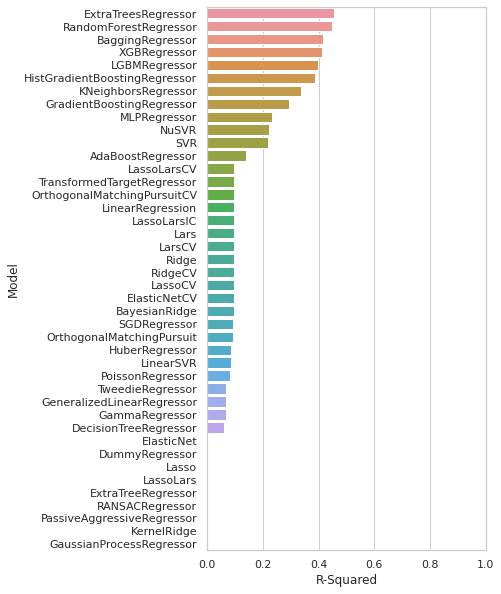

In [22]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

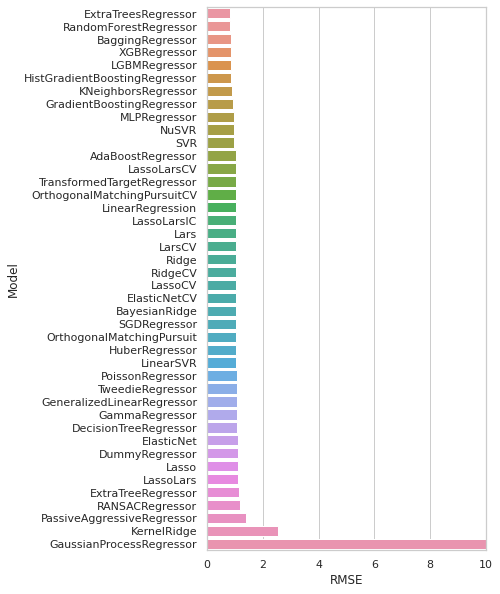

In [23]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 4.0)]

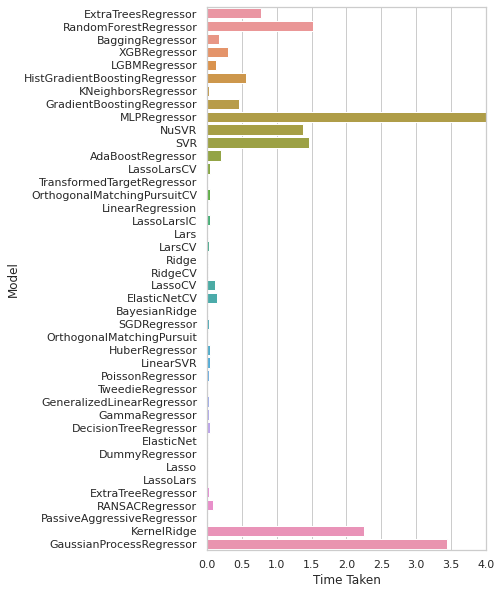

In [24]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 4))